# Kilosort->Phy gui output analysis

In [1]:
import Python3_unit_analysis_functions as func

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import time
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
import scipy.stats as sstat
import scipy.signal as ssig
import h5py
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
import re
import fnmatch
# from PyPDF2 import PdfFileMerger, PdfFileReader
import seaborn as sns
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42 
mpl.rcParams['font.sans-serif']=['Arial', 'Helvetica','Bitstream Vera Sans', 'DejaVu Sans', 'Lucida Grande', 
                                 'Verdana', 'Geneva', 'Lucid', 'Avant Garde', 'sans-serif']  


# pal=sns.blend_palette(["black", "crimson"], 2)
sns.despine()
# current_palette = sns.color_palette("colorblind", 10)
# sns.set_palette(current_palette)

# for publication quality plots, not bar graphs, use this: 
def set_pub_plots(pal=sns.blend_palette(["gray","crimson", 'cyan', 'magenta', 'purple' ],5)):
    sns.set_style("white")
    sns.set_palette(pal)
    sns.set_context("poster", font_scale=1.5, rc={"lines.linewidth": 2.5, "axes.linewidth":2.5}) 
    sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    # optional, makes markers bigger, too, axes.linewidth doesn't seem to work
    plt.rcParams['axes.linewidth'] = 2.5

rc_pub={'font.size': 25, 'axes.labelsize': 25, 'legend.fontsize': 25.0, 
    'axes.titlesize': 25, 'xtick.labelsize': 25, 'ytick.labelsize': 25, 
    #'axes.color_cycle':pal, # image.cmap - rewritesd the default colormap
    'axes.linewidth':2.5, 'lines.linewidth': 2.5,
    'xtick.color': 'black', 'ytick.color': 'black', 'axes.edgecolor': 'black','axes.labelcolor':'black','text.color':'black'}
# to restore the defaults, call plt.rcdefaults() 

#set_pub_bargraphs()
set_pub_plots()



#%matplotlib notebook

<Figure size 640x480 with 0 Axes>

In [3]:
probe = '64DA'
channel_groups = func.get_channel_groups(probe)
# channel_groups

## Loading .npy files

In [33]:
path = r'u:\Data\tang232\LMArch_V1Rec\openephys\new'
ls=[]
for d in os.listdir(path):
    ls.append(os.path.join(path,d))
ls = [i for i in ls if '' in i and 'txt' not in i]
lst= [os.path.join(p,d) for p in ls for d in os.listdir(p) if 'V1' in d]
lst2= [os.path.join(p,d) for p in lst for d in os.listdir(p) if 'conc' in d]

# lst2

In [27]:
note=r'u:\Data\tang232\LMArch_V1Rec\note.txt'
text_file = open(note, "r")
# lines = text_file.readlines()
lines = text_file.read().split('\n')
et_to_exclude=[et for et in lines if 'ET#' in et]
text_file.close()
print (et_to_exclude)

['ET#427_pre', 'ET#427_post', 'ET#428_pre', 'ET#428_post', 'ET#429_pre', 'ET#429_post', 'ET#430_pre', 'ET#430_post', 'ET#431_pre', 'ET#431_post', 'ET#444_pre', 'ET#444_post', 'ET#494_post', 'ET#493_post', 'ET#493r_post']


In [28]:
match=[f for f in lst2 if not any(et in f for et in et_to_exclude)]
sorted(match)

['u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\07.10.2018_CC#047967_ET#747_pre\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\07.10.2018_CC#047967_ET#748_pre\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\07.10.2018_CC#047967_ET#749_pre\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\07.17.2018_CC#047967_ET#748_post\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\07.17.2018_CC#047967_ET#749_post\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\08.23.2018_CC#040786_ET#426_pre\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\08.28.2018_CC#040786_ET#426_post\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\10.11.2018_CC#054587_ET#443_post\\LM\\conc',
 'u:\\Data\\tang232\\LMArch_V1Rec\\openephys\\new\\10.11.2018_CC#054587_ET#445_post\\LM\\conc']

In [29]:
conditions = dict()
for p in lst:
    et = str('_'.join(p.split('\\')[-2].split('_')[-2:]))
    tmp = [' '.join(pp.split('_')[0].split(' ')[1:]) for pp in sorted(os.listdir(p)) if 'conc' not in pp]
    conditions[et]=tmp
conditions

{'ET#747_pre': ['G-1-G---G',
  'G---G---G LM ArchT 4.5mW',
  'G---G---G LM ArchT 9.2mW'],
 'ET#748_pre': ['G-1-G---G',
  'G---G---G LM ArchT 4.5mW',
  'G---G---G LM ArchT 9.2mW'],
 'ET#749_pre': ['G-1-G---G',
  'G---G---G LM ArchT 4.5mW',
  'G---G---G LM ArchT 9.2mW'],
 'ET#748_post': ['G-1-G---G',
  'G-N-G---G',
  'G---G---G LM ArchT 4.5mW',
  'G---G---G LM ArchT 8.5mW'],
 'ET#749_post': ['G-1-G---G',
  'G-N-G---G',
  'G-1-G---G LM ArchT 4.5mW',
  'G-1-G---G LM ArchT 8.5mW'],
 'ET#426_pre': ['G-1-G---G',
  'G-1-G---G LM ArchT 1.5mW',
  'G-1-G---G LM ArchT 4.5mW',
  'G-1-G---G LM ArchT 9.3mW'],
 'ET#427_pre': ['G-1-G---G',
  'G-1-G---G LM ArchT 1.5mW',
  'G-1-G---G LM ArchT 4.5mW',
  'G-1-G---G LM ArchT 9.3mW'],
 'ET#428_pre': ['G-1-G---G',
  'G-1-G---G LM ArchT 1.5mW',
  'G-1-G---G LM ArchT 4.5mW',
  'G-1-G---G LM ArchT 9.3mW'],
 'ET#429_pre': ['G-1-G---G',
  'G-1-G---G LM ArchT 1.5mW',
  'G-1-G---G LM ArchT 4.5mW',
  'G-1-G---G LM ArchT 9.3mW'],
 'ET#430_pre': ['G-1-G---G',
  'G-1-G-

In [30]:
# for each recording, (total recording duration, recording duration, number of sequences?)
cond_dur={'G-1-G---G':(80.0,4.0,1),
          'G-N-G---G':(80.0,4.0,1),
          '12Drifting':(360.0,2.0,12),
          'BP SF tuning':(200.0,2.0,1),
          'G-1-G---G LM ArchT 1.5mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 4.5mW':(80.0,4.0,1),
          'G---G---G LM ArchT 4.5mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 5.0mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 8.5mW':(80.0,4.0,1),
          'G---G---G LM ArchT 8.5mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 9.2mW':(80.0,4.0,1),
          'G---G---G LM ArchT 9.2mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 9.3mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 10mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 10.0mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 10.0+mW':(80.0,4.0,1),
          'G-1-G---G LM ArchT 10+mW':(80.0,4.0,1),
          'G-N-G---G LM ArchT 1.5mW':(80.0,4.0,1),
          'BP SF tuning LM ArchT 8.5mW':(200.0,2.0,1),
          'BP SF tuning LM ArchT 9.3mW':(200.0,2.0,1),
          'Visual Chirp':(120.0,6.0,1)
          }

In [31]:
##### recording durations ######
t_dic = dict()
for k,v in conditions.items():
    print (k,v)
    t = 0
    tmp = [t]
    for i in range(len(v)):
        t = t + cond_dur[v[i]][0]
        tmp.append(t)
        t_dic[k] = tmp
t_dic

ET#747_pre ['G-1-G---G', 'G---G---G LM ArchT 4.5mW', 'G---G---G LM ArchT 9.2mW']
ET#748_pre ['G-1-G---G', 'G---G---G LM ArchT 4.5mW', 'G---G---G LM ArchT 9.2mW']
ET#749_pre ['G-1-G---G', 'G---G---G LM ArchT 4.5mW', 'G---G---G LM ArchT 9.2mW']
ET#748_post ['G-1-G---G', 'G-N-G---G', 'G---G---G LM ArchT 4.5mW', 'G---G---G LM ArchT 8.5mW']
ET#749_post ['G-1-G---G', 'G-N-G---G', 'G-1-G---G LM ArchT 4.5mW', 'G-1-G---G LM ArchT 8.5mW']
ET#426_pre ['G-1-G---G', 'G-1-G---G LM ArchT 1.5mW', 'G-1-G---G LM ArchT 4.5mW', 'G-1-G---G LM ArchT 9.3mW']
ET#427_pre ['G-1-G---G', 'G-1-G---G LM ArchT 1.5mW', 'G-1-G---G LM ArchT 4.5mW', 'G-1-G---G LM ArchT 9.3mW']
ET#428_pre ['G-1-G---G', 'G-1-G---G LM ArchT 1.5mW', 'G-1-G---G LM ArchT 4.5mW', 'G-1-G---G LM ArchT 9.3mW']
ET#429_pre ['G-1-G---G', 'G-1-G---G LM ArchT 1.5mW', 'G-1-G---G LM ArchT 4.5mW', 'G-1-G---G LM ArchT 9.3mW']
ET#430_pre ['G-1-G---G', 'G-1-G---G LM ArchT 1.5mW', 'G-1-G---G LM ArchT 4.5mW', 'G-1-G---G LM ArchT 9.3mW']
ET#431_pre ['G-1-G---G

{'ET#747_pre': [0, 80.0, 160.0, 240.0],
 'ET#748_pre': [0, 80.0, 160.0, 240.0],
 'ET#749_pre': [0, 80.0, 160.0, 240.0],
 'ET#748_post': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#749_post': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#426_pre': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#427_pre': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#428_pre': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#429_pre': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#430_pre': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#431_pre': [0, 80.0, 160.0, 240.0, 320.0],
 'ET#426_post': [0, 80.0, 160.0],
 'ET#428_post': [0, 80.0, 160.0],
 'ET#429_post': [0, 80.0, 160.0],
 'ET#430_post': [0, 80.0, 160.0, 240.0],
 'ET#431_post': [0, 80.0, 160.0, 240.0],
 'ET#443_post': [0, 80.0, 160.0, 240.0],
 'ET#445_post': [0, 80.0, 160.0, 240.0, 320.0]}

In [32]:
# path=r'u:\Data\tang232\Receptive_field\10.31.2017 RF+Size+LM\openephys\11.01.2017_CC#_ET#048_pre\conc-V1 center sizes'
tmp=[]
for f in match:
    et = '_'.join(f.split('\\')[-3].split('_')[-2:])
    pre_post = f.split('\\')[-3].split('_')[-1]
    path = f
    
    spike_times = np.load(os.path.join(path, 'spike_times.npy'))
    spike_clusters = np.load(os.path.join(path, 'spike_clusters.npy'))
    templates = np.load(os.path.join(path, 'templates.npy'))
    spike_templates = np.load(os.path.join(path, 'spike_templates.npy'))
    df = pd.DataFrame({'times':spike_times.flatten()/30000.0, 
                       'cluster_id':spike_clusters.flatten(), 
                       'templates':spike_templates.flatten(),
                       'ET':et,
                       'pre_post':pre_post,
                       'path':f,
                      })


    path_cluster_groups = os.path.join(path, 'cluster_groups.csv')
    if os.path.exists(path_cluster_groups):
        cluster_groups = pd.read_csv(path_cluster_groups, sep = '\t')
        # good_units = cluster_groups[cluster_groups.group != 'noise'].cluster_id.values
        noise_units = cluster_groups[cluster_groups['group'] == 'noise'].cluster_id.values
        df_rez = df[~df.cluster_id.isin(noise_units)]
    else:
        df_rez = df
#     df_rez = df
#     df_rez#[df_rez.trial_n==2]
    tmp.append(df_rez)
df_rez = pd.concat(tmp)
df_rez

,times,cluster_id,templates,ET,pre_post,path
5,0.035600,249,10,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....
14,0.061333,196,53,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....
19,0.068067,196,53,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....
20,0.071233,249,10,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....
47,0.145433,249,10,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....
...,...,...,...,...,...,...
92135,319.993667,0,65,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....
92136,319.993733,0,167,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....
92137,319.993733,86,85,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....
92138,319.994100,0,180,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....


In [ ]:
##### 9.21.2018, new mapping ####
for k,v in t_dic.items():
    for i in range(len(v)-1):
        df_rez.loc[(df_rez.ET==k)&(df_rez.times>v[i])&(df_rez.times<=v[i+1]),'exprt'] = conditions[k][i]
#         print v[i], v[i+1], conditions[k][i]



ori = [ 5,  1,  8,  0,  4,  3,  6, 10,  2, 11,  7,  9]
ori_dic = dict(zip(range(0,12),range(0,365,30)))
tr_ori_dic = dict(zip(range(0,12), ori))
sf_seq = [1, 4, 0, 3, 3, 1, 2, 1, 1, 2, 1, 2, 2, 3, 0, 4, 4, 4, 1, 2, 
          3, 2, 4, 4, 0, 0, 3, 0, 3, 0, 1, 2, 1, 4, 0, 3, 3, 4, 1, 4, 
          2, 1, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 4, 3, 2, 0, 0, 4, 0, 2, 
          0, 0, 4, 2, 1, 2, 4, 2, 3, 2, 0, 1, 3, 4, 0, 0, 3, 4, 3, 0, 
          3, 0, 2, 3, 3, 4, 3, 3, 4, 4, 2, 0, 1, 1, 3, 4, 0, 3, 4, 2]
sf_dic = dict(zip(range(len(sf_seq)),sf_seq))
sf = [0.01, 0.02, 0.04, 0.08, 0.16]
tr_sf_dic = dict(zip(range(0,5), sf))


# tr_ori_dic
for et in df_rez.ET.unique():
    print( et)
    for i,v in enumerate(conditions[et]):
        if v=='12Drifting' or v=='12ori':
            df_rez.loc[(df_rez.exprt == v)&(df_rez.ET == et),'trial'] = (df_rez[(df_rez.exprt == v)&(df_rez.ET == et)].times
                                                                         -t_dic[et][i])//(cond_dur[v][2]*cond_dur[v][1])
#             df_rez.loc[(df_rez.exprt == v)&(df_rez.ET == et),'idx'] = (df_rez[(df_rez.exprt == v)&(df_rez.ET == et)].times
#                                                                          -t_dic[et][i])//(cond_dur[v][2]*cond_dur[v][1])
        if v=='BP SF tuning' and df_rez[(df_rez.exprt == 'BP SF tuning')&(df_rez.ET == et)].shape[0]>0:
            df_rez.loc[(df_rez.exprt == 'BP SF tuning')&(df_rez.ET == et),'trial'
                      ] = (df_rez[(df_rez.exprt == 'BP SF tuning')&(df_rez.ET == et)].times
                                -int(df_rez[(df_rez.exprt == 'BP SF tuning')&(df_rez.ET == et)].times.min()))//2.0
        if v=='BP SF tuning LM ArchT 8.5mW' and df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW')&(df_rez.ET == et)].shape[0]>0:
            df_rez.loc[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW')&(df_rez.ET == et),'trial'
                      ] = (df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW')&(df_rez.ET == et)].times
                        -int(df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW')&(df_rez.ET == et)].times.min()))//2.0
        if v=='BP SF tuning LM ArchT 9.3mW' and df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW')&(df_rez.ET == et)].shape[0]>0:
            df_rez.loc[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW')&(df_rez.ET == et),'trial'
                      ] = (df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW')&(df_rez.ET == et)].times
                        -int(df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW')&(df_rez.ET == et)].times.min()))//2.0


df_rez.loc[(df_rez.exprt == '12Drifting'),'ori'] = df_rez[(df_rez.exprt == '12Drifting')].trial.map(tr_ori_dic)
df_rez.loc[(df_rez.exprt == 'BP SF tuning'),'sf_idx'] = df_rez[(df_rez.exprt == 'BP SF tuning')].trial.map(sf_dic)
df_rez.loc[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW'),'sf_idx'] = df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW')].trial.map(sf_dic)
df_rez.loc[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW'),'sf_idx'] = df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW')].trial.map(sf_dic)
df_rez.loc[(df_rez.exprt == 'BP SF tuning'),'sf'] = df_rez[(df_rez.exprt == 'BP SF tuning')].sf_idx.map(tr_sf_dic)
df_rez.loc[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW'),'sf'] = df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 8.5mW')].sf_idx.map(tr_sf_dic)
df_rez.loc[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW'),'sf'] = df_rez[(df_rez.exprt == 'BP SF tuning LM ArchT 9.3mW')].sf_idx.map(tr_sf_dic)
df_rez.head()

In [38]:
df_rez['id'] = df_rez['ET'].str.replace('#','')+'_'+df_rez['cluster_id'].astype(str)
df_rez

,times,cluster_id,templates,ET,pre_post,path,exprt,id
5,0.035600,249,10,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....,G-1-G---G,ET747_pre_249
14,0.061333,196,53,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....,G-1-G---G,ET747_pre_196
19,0.068067,196,53,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....,G-1-G---G,ET747_pre_196
20,0.071233,249,10,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....,G-1-G---G,ET747_pre_249
47,0.145433,249,10,ET#747_pre,pre,u:\Data\tang232\LMArch_V1Rec\openephys\new\07....,G-1-G---G,ET747_pre_249
...,...,...,...,...,...,...,...,...
92135,319.993667,0,65,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....,G-1-G---G LM ArchT 10.0+mW,ET445_post_0
92136,319.993733,0,167,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....,G-1-G---G LM ArchT 10.0+mW,ET445_post_0
92137,319.993733,86,85,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....,G-1-G---G LM ArchT 10.0+mW,ET445_post_86
92138,319.994100,0,180,ET#445_post,post,u:\Data\tang232\LMArch_V1Rec\openephys\new\10....,G-1-G---G LM ArchT 10.0+mW,ET445_post_0


In [34]:
report_directory = r'U:\Data\tang232\LMArch_V1Rec\Report/'
# df_rez=pd.read_pickle(report_directory+'df_rez.pkl')

In [37]:
trial_n_length ={'G-1-G---G':(20, 4.0),
                 'G-N-G---G':(20, 4.0),
                 '12Drifting':(12*15, 2.0),
                 'BP SF tuning':(5*20, 2.0),
                 'G-1-G---G LM ArchT 1.5mW':(20, 4.0),
                 'G-1-G---G LM ArchT 4.5mW':(20, 4.0),
#                  'G---G---G LM ArchT 4.5mW':(20, 4.0),
                 'G-1-G---G LM ArchT 5.0mW':(20, 4.0),
                 'G-1-G---G LM ArchT 8.5mW':(20, 4.0),
                 'G-1-G---G LM ArchT 9.2mW':(20, 4.0),
                 'G-1-G---G LM ArchT 9.3mW':(20, 4.0),
                 'G-1-G---G LM ArchT 10mW':(20, 4.0),
                 'G-1-G---G LM ArchT 10+mW':(20, 4.0),
                 'G-1-G---G LM ArchT 10.0mW':(20, 4.0),
                 'G-1-G---G LM ArchT 10.0+mW':(20, 4.0),
                 'BP SF tuning LM ArchT 8.5mW':(5*20, 2.0),
                 'BP SF tuning LM ArchT 9.3mW':(5*20, 2.0), 
                 'Visual Chirp':(20, 6.0),
                 
                }
trial_n_length

{'G-1-G---G': (20, 4.0),
 'G-N-G---G': (20, 4.0),
 '12Drifting': (180, 2.0),
 'BP SF tuning': (100, 2.0),
 'G-1-G---G LM ArchT 1.5mW': (20, 4.0),
 'G-1-G---G LM ArchT 4.5mW': (20, 4.0),
 'G-1-G---G LM ArchT 5.0mW': (20, 4.0),
 'G-1-G---G LM ArchT 8.5mW': (20, 4.0),
 'G-1-G---G LM ArchT 9.2mW': (20, 4.0),
 'G-1-G---G LM ArchT 9.3mW': (20, 4.0),
 'G-1-G---G LM ArchT 10mW': (20, 4.0),
 'G-1-G---G LM ArchT 10+mW': (20, 4.0),
 'G-1-G---G LM ArchT 10.0mW': (20, 4.0),
 'G-1-G---G LM ArchT 10.0+mW': (20, 4.0),
 'BP SF tuning LM ArchT 8.5mW': (100, 2.0),
 'BP SF tuning LM ArchT 9.3mW': (100, 2.0),
 'Visual Chirp': (20, 6.0)}

In [38]:
probe_dic = {'ET#747_pre': '64DA',
             'ET#748_pre': '64DA',
             'ET#749_pre': '64DA',
             'ET#747_post': '64DA',
             'ET#748_post': '64DA',
             'ET#749_post': '64DA',
             'ET#426_pre': '64DB',
             'ET#427_pre': '64DB',
             'ET#428_pre': '64DB',
             'ET#429_pre': '64DB',
             'ET#430_pre': '64DB',
             'ET#431_pre': '64DB',
             'ET#426_post': '64DB',
             'ET#427_post': '64DB',
             'ET#428_post': '64DA',
             'ET#429_post': '64DA',
             'ET#430_post': '64DA',
             'ET#431_post': '64DA',
             'ET#443_pre':'64DA',
             'ET#444_pre':'64DA',
             'ET#445_pre':'64DA',
             'ET#443_post':'64DA',
             'ET#444_post':'64DA',
             'ET#445_post':'64DA',
            }

compute psth

In [40]:
#### power for each mouse with diminished oscillations###
power_dic = {'ET#747_pre': 'G-1-G---G LM ArchT 4.5mW',
             'ET#748_pre': 'G-1-G---G LM ArchT 4.5mW',
             'ET#749_pre': 'G-1-G---G LM ArchT 4.5mW',
             'ET#747_post': 'G-1-G---G LM ArchT 1.5mW',
             'ET#748_post': 'G-1-G---G LM ArchT 1.5mW',
             'ET#749_post': 'G-1-G---G LM ArchT 8.5mW',
             'ET#426_pre': 'G-1-G---G LM ArchT 1.5mW',
             'ET#426_post': 'G-1-G---G LM ArchT 9.3mW',
             'ET#443_pre':'G-1-G---G LM ArchT 1.5mW',
             'ET#443_post':'G-1-G---G LM ArchT 5.0mW',
             'ET#445_pre':'G-1-G---G LM ArchT 1.5mW',
             'ET#445_post':'G-1-G---G LM ArchT 10mW',
             }

In [41]:
# raw=pd.read_pickle(r'U:\Data\tang232\Receptive_field\4X4 RF Mapping\units\06.14.2017\RF_Raw.pkl')
# path = r"U:\Data\tang232\Receptive_field\4X4 RF Mapping\openephys\06.18.2017\conc-inout"
# RF=[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]*3 # 0 is in RF, 1 is out RF
# size=[0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]*3 # 0 is RF size, 1 is 2*RF size
# RFsize = [i for i,x in enumerate(RF) if x == 0]
# RF_2size = [i for i,x in enumerate(RF) if x == 1]

data = df_rez[(df_rez.exprt!='12Drifting')&(df_rez.exprt!='BP SF tuning')&(df_rez.exprt!='BP SF tuning LM ArchT 8.5mW')
              &(df_rez.exprt.str.contains('G-1'))
              &(df_rez.ET.str.contains('|'.join(list(power_dic.keys()))))
              ]
# trials_number = 20
# trial_length = 4.0
ls_psth = []
ls_tmt = []

th_bin = 0.01

for i in data.id.unique():
    tm=data[data.id==i]
    pre_post = tm.pre_post.unique()[0]
    et = tm.ET.unique()[0]
    tmp=tm[(tm.exprt=='G-1-G---G') | (tm.exprt==power_dic[et])|(tm.exprt=='Visual Chirp')]
    
    for unit in tmp['cluster_id'].unique():
        tmp1=tmp[(tmp.cluster_id==unit)]
        probe = probe_dic[tmp1.ET.unique()[0]]
        channel_groups=func.get_channel_groups(probe)
        tmt, depth,shank = func.ksort_get_tmt(tmp1, unit, channel_groups
                                             ,os.path.join(tmp1.path.unique()[0], 'templates.npy'))
        cuid = str(unit)
        df_tmt_tmp = pd.DataFrame({'tmt':tmt,
                                   'cluster_id':unit,
                                   'id':i,
                                   })
        ls_tmt.append(df_tmt_tmp)
        for exprt in tmp1.exprt.unique():
            tmp2 = tmp1[tmp1.exprt==exprt]
            trials_number = trial_n_length[exprt][0]
            trial_length = trial_n_length[exprt][1]
            
            df = func.getRaster_kilosort(tmp2, unit, trial_length)
#             path = tmp.path.unique()[0]
#             peak_wfs, avg_wv, sem = get_raw_waveforms(path, unit, [-30, 40])
            h, ttr=func.PSTH(df.times, th_bin, trial_length, trials_number) # all times rescaled to 0-4 this is why trias number 1.0
            zscore = sstat.mstats.zscore(h)
            mean = np.mean(h[:]) 
            std = np.std(h[:])
            if mean==0:
                std=1
            ztc = (h - mean)/std
            if exprt == 'G-1-G---G':
                power='Control'
            elif exprt == 'Visual Chirp':
                power='na'
            else:
                power='LM ArchT'
            df_psth_tmp = pd.DataFrame({'times':ttr,    
                                        'Hz':h,
                                        'zscore':zscore, 
                                        'ztc':ztc, 
                                        'cuid':unit,
                                        'depth': depth,
                                        'id':i,
                                        'pre_post':pre_post,
                                        'exprt':exprt,
                                        'power':power
                                        })
            

            ls_psth.append(df_psth_tmp)
df_psth = pd.concat(ls_psth)
df_tmt = pd.concat(ls_tmt)
df_psth.tail()

,times,Hz,zscore,ztc,cuid,depth,id,pre_post,exprt,power
395,3.95,0.0,-1.375987,-1.375987,247,325,ET445_post_247,post,G-1-G---G,Control
396,3.96,0.0,-1.375987,-1.375987,247,325,ET445_post_247,post,G-1-G---G,Control
397,3.97,0.0,-1.375987,-1.375987,247,325,ET445_post_247,post,G-1-G---G,Control
398,3.98,0.0,-1.375987,-1.375987,247,325,ET445_post_247,post,G-1-G---G,Control
399,3.99,0.0,-1.375987,-1.375987,247,325,ET445_post_247,post,G-1-G---G,Control


In [42]:
df_psth['et']=df_psth['id'].apply(lambda x:'_'.join(x.replace('ET','ET#').split('_')[:-1]))
df_psth.head()

,times,Hz,zscore,ztc,cuid,depth,id,pre_post,exprt,power,et
0,0.00,6.419081,-1.200820,-1.200820,12,375,ET747_pre_12,pre,G-1-G---G,Control,ET#747_pre
1,0.01,8.532317,-0.500613,-0.500613,12,375,ET747_pre_12,pre,G-1-G---G,Control,ET#747_pre
2,0.02,10.705175,0.219351,0.219351,12,375,ET747_pre_12,pre,G-1-G---G,Control,ET#747_pre
3,0.03,10.950170,0.300528,0.300528,12,375,ET747_pre_12,pre,G-1-G---G,Control,ET#747_pre
4,0.04,11.844316,0.596798,0.596798,12,375,ET747_pre_12,pre,G-1-G---G,Control,ET#747_pre


In [45]:
toplot=df_psth.copy()
# toplot=toplot[(toplot.exprt=='G-1-G---G')
#                 |(toplot[['et', 'exprt']
#                     ].apply(tuple, axis=1).isin(list(zip(power_dic.keys(),power_dic.values()))))]
toplot.groupby(['exprt','pre_post']).et.describe()

count unique          top   freq
exprt                    pre_post                                  
G-1-G---G                post      69200      6  ET#748_post  15200
                         pre       88400      6   ET#426_pre  30800
G-1-G---G LM ArchT 1.5mW post      22000      2  ET#748_post  15200
                         pre       69600      3   ET#426_pre  30800
G-1-G---G LM ArchT 4.5mW pre       21600      3   ET#747_pre   9600
G-1-G---G LM ArchT 5.0mW post      13600      1  ET#443_post  13600
G-1-G---G LM ArchT 8.5mW post       8000      1  ET#749_post   8000
G-1-G---G LM ArchT 9.3mW post      11600      1  ET#426_post  11600

In [47]:
# report_directory = r'U:\Data\tang232\LMArch_V1Rec\Report'
# df_psth.to_pickle(report_directory+'G1psth_lmunits.pkl')
# df_psth=pd.read_pickle(report_directory+'G1psth.pkl')

In [ ]:
data=df_psth[df_psth.exprt!='Visual Chirp'].dropna(subset=['zscore'])
# sns.tsplot(data=data,time='times',value='zscore', condition = 'pre_post', unit ='id', color=['gray','red'],
#            alpha=0.7, ci=68)
a,b = 0.5, 0.7
f, ax = plt.subplots(1,len(data.pre_post.unique()), sharey=True,figsize = (15,4))
for i,pp in enumerate(sorted(data.pre_post.unique(),reverse=True)):
    tmp = data[data.pre_post==pp]
    sns.lineplot(data=tmp,x='times',y='zscore', hue = 'power', 
#                  unit ='id', 
#                color=['gray','red'],
               ax = ax[i],alpha=0.7, ci=68 )
    sns.despine()
    ax[i].set_title(pp)
    ax[i].legend(loc='upper right')
    ax[i].axvspan(a, b, color='gray', alpha=0.5, lw=0)
    ax[i].set_xlabel('Time(s)')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,2)
ax[0].set_ylabel('Z-score')
# ax[0].set_ylabel('Firing rate(Hz)')


# report_directory = r'u:\Data\tang232\LMArch_V1Rec\Report\10.26.2018/'
report_directory = r'u:\Data\tang232\LMArch_V1Rec\Report\01.02.2022/'

name =''
# plt.savefig(report_directory+'_zsc_2ndgui.pdf')
# plt.savefig(report_directory+'_zsc_2ndgui.png')


In [76]:
tmpls=[]
for i,pp in enumerate(sorted(data.pre_post.unique(), reverse=True)):
    tmp = data[data.pre_post==pp]
    for ix,power in enumerate(sorted(tmp.power.unique())):
        tmp1 = tmp[tmp.power==power]
        hm = tmp1.pivot('id', 'times', 'zscore')
        tmp2=pd.concat([hm.iloc[:,50:70].max(axis=1).to_frame('tw1')
                      ,hm.iloc[:,70:90].max(axis=1).to_frame('tw2')
                      ,hm.iloc[:,90:110].max(axis=1).to_frame('tw3')]
                     ,axis=1
                     )
        tmp2['power']=power
        tmp2['pre_post']=pp
        tmpls.append(tmp2)
peakdf=pd.concat(tmpls)
peakdf.head()

,tw1,tw2,tw3,power,pre_post
id,,,,,
ET426_pre_0,2.016468,4.065995,1.196367,Control,pre
ET426_pre_1,6.041836,0.994385,0.757055,Control,pre
ET426_pre_10,4.535610,3.905480,0.821903,Control,pre
ET426_pre_100,2.483535,2.093432,0.724272,Control,pre
ET426_pre_105,2.909015,0.677333,2.413537,Control,pre


In [77]:
peakdf.loc[((peakdf.tw1>peakdf.tw2)&(peakdf.tw1>peakdf.tw3)),'peak']=1
peakdf.loc[((peakdf.tw2>peakdf.tw1)&(peakdf.tw2>peakdf.tw3)),'peak']=2
peakdf.loc[((peakdf.tw3>peakdf.tw2)&(peakdf.tw3>peakdf.tw1)),'peak']=3
peakdf=peakdf.reset_index()

In [78]:
peakdic=dict(zip(peakdf[(peakdf.pre_post=='post')&(peakdf.power=='Control')]['id']
,peakdf[(peakdf.pre_post=='post')&(peakdf.power=='Control')].peak,))
peakdic

{'ET426_post_185': 2.0,
 'ET426_post_210': 3.0,
 'ET426_post_219': 1.0,
 'ET426_post_221': 1.0,
 'ET426_post_225': 3.0,
 'ET426_post_232': nan,
 'ET426_post_244': 3.0,
 'ET426_post_281': 1.0,
 'ET426_post_290': 3.0,
 'ET426_post_326': 1.0,
 'ET426_post_359': 2.0,
 'ET426_post_399': 1.0,
 'ET426_post_428': 1.0,
 'ET426_post_434': 3.0,
 'ET426_post_436': 1.0,
 'ET426_post_442': 3.0,
 'ET426_post_448': 1.0,
 'ET426_post_463': 1.0,
 'ET426_post_489': 2.0,
 'ET426_post_506': 3.0,
 'ET426_post_518': 1.0,
 'ET426_post_554': 1.0,
 'ET426_post_562': nan,
 'ET426_post_570': 2.0,
 'ET426_post_590': 2.0,
 'ET426_post_615': 1.0,
 'ET426_post_617': 2.0,
 'ET426_post_625': 1.0,
 'ET426_post_629': 1.0,
 'ET426_post_643': 1.0,
 'ET426_post_648': 2.0,
 'ET426_post_665': 1.0,
 'ET426_post_673': 2.0,
 'ET443_post_10': 1.0,
 'ET443_post_100': 1.0,
 'ET443_post_133': 1.0,
 'ET443_post_197': 2.0,
 'ET443_post_199': 3.0,
 'ET443_post_203': 1.0,
 'ET443_post_211': 3.0,
 'ET443_post_217': 2.0,
 'ET443_post_227'

In [79]:
tw1=peakdf.drop(columns=['tw2','tw3']).rename(columns={'tw1':'maxzsc'})
tw1['tw']=1
tw2=peakdf.drop(columns=['tw1','tw3']).rename(columns={'tw2':'maxzsc'})
tw2['tw']=2
tw3=peakdf.drop(columns=['tw2','tw1']).rename(columns={'tw3':'maxzsc'})
tw3['tw']=3
twdf=pd.concat([tw1,tw2,tw3])
twdf['peak']=twdf.id.map(peakdic)

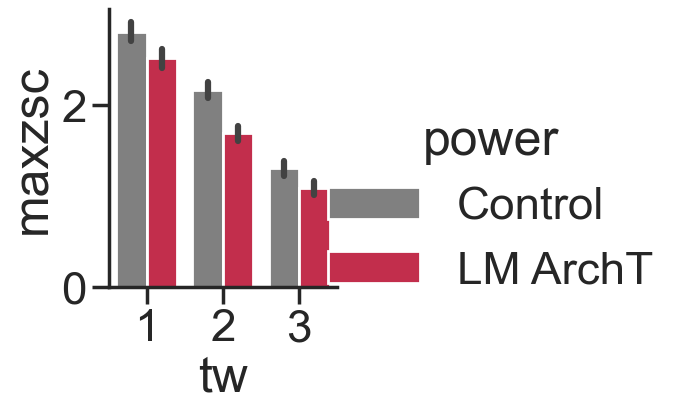

In [82]:
twdf=twdf.groupby('id').filter(lambda x:x.power.nunique()>1)
sns.catplot(data=twdf,x='tw',y='maxzsc'
           ,kind='bar',ci=68
#             ,estimator=np.median
            ,hue='power'#,hue_order=['pre','post']
#             ,col='peak'
            ,
           )

In [83]:
import pingouin as pg
statls=[]
for n,g in twdf[twdf.pre_post=='post'].groupby(['tw']):
    print(n)
    stat=pg.mwu(g[g.power.str.contains('Arch')].maxzsc
                , g[g.power.str.contains('Control')].maxzsc)
    
    stat['nunit']=g.id.nunique()
    stat['nmice']=g.id.transform(lambda x:'_'.join(x.split('_')[:2])).nunique()
    stat['tw']=n#[1]
#     stat['peak']=n[0]
    statls.append(stat)
statdf=pd.concat(statls)
statdf['pcorr']=pg.multicomp(statdf['p-val'].values,method='fdr_bh')[-1]
# statdf.to_csv(report_directory+'_zscpeak_filtered_bar_stats.csv')
statdf

1
2
3


,U-val,alternative,p-val,RBC,CLES,nunit,nmice,tw,pcorr
MWU,8407.0,two-sided,0.368536,0.063600,0.468200,134,5,1,0.368536
MWU,7366.0,two-sided,0.011084,0.179550,0.410225,134,5,2,0.024982
MWU,7458.5,two-sided,0.016655,0.169247,0.415376,134,5,3,0.024982


V1 spontaneous activity when laser is off

([<matplotlib.axis.YTick at 0x1f791340c70>,
 [Text(0, 0, '0'),
  Text(0, 2, '2'),
  Text(0, 4, '4'),
  Text(0, 6, '6'),
  Text(0, 8, '8')])

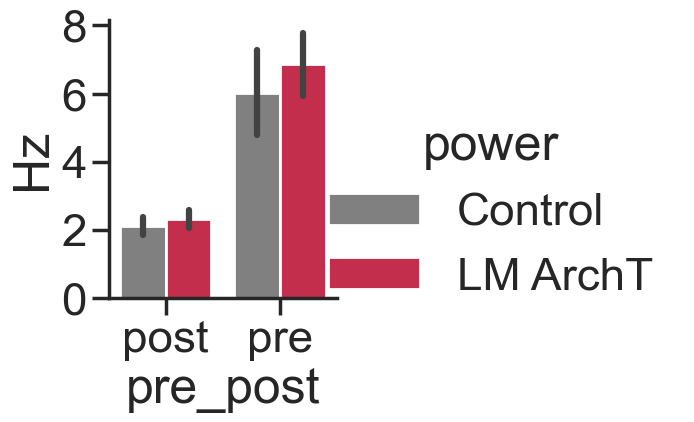

In [58]:
# g.power.unique()
toplot=data.groupby(['id','pre_post','exprt','power']
                   ).apply(lambda x:x[x.times.between(2,3)].Hz.median()).to_frame('Hz').reset_index()
toplot=toplot.groupby('id').filter(lambda x:x.exprt.nunique()==2).reset_index()
sns.catplot(data=toplot,x='pre_post',y='Hz',hue='power'
           ,kind='bar',ci=68
           )
# plt.ylim(0,20)
plt.yticks(np.arange(0,10,2),np.arange(0,10,2))
# plt.savefig(report_directory+'_Hz_2ndgui_bar_2-3s.pdf')
# plt.savefig(report_directory+'_Hz_2ndgui_bar_2-3s.png')

In [76]:
# sns.displot(data=totest,x='Hz',hue='power')

In [60]:
import pingouin as pg
totest=toplot[toplot.pre_post=='post']
norm=totest.groupby('power').Hz.apply(pg.normality)
description=totest.groupby('power').Hz.describe()
stats=pg.wilcoxon(totest[totest.power.str.contains('Arch')].Hz
                  ,totest[totest.power.str.contains('Control')].Hz)

stats
# description.to_csv(report_directory+'_Hz_2ndgui_bar_2-3s_description.csv')
# norm.to_csv(report_directory+'_Hz_2ndgui_bar_2-3s_normality.csv')
# stats.to_csv(report_directory+'_Hz_2ndgui_bar_2-3s_stats.csv')

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,3116.0,two-sided,0.137617,0.15567,0.51189


In [56]:
import scipy

ET426


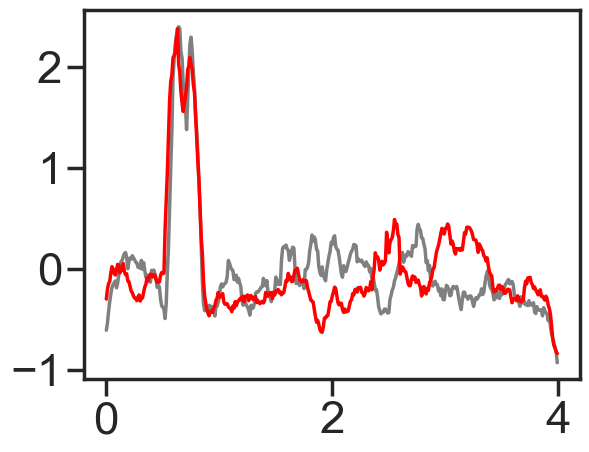

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '


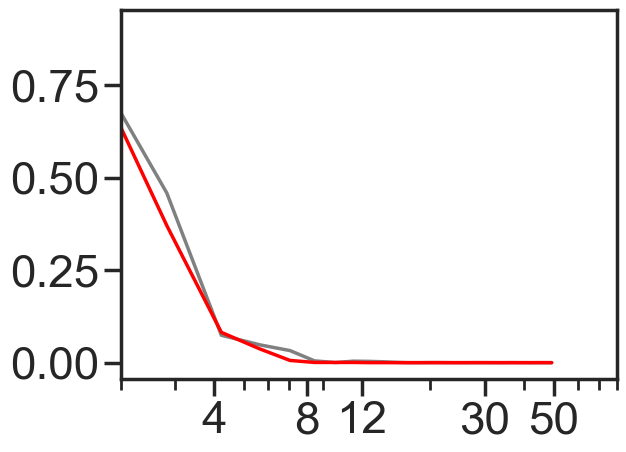

ET443


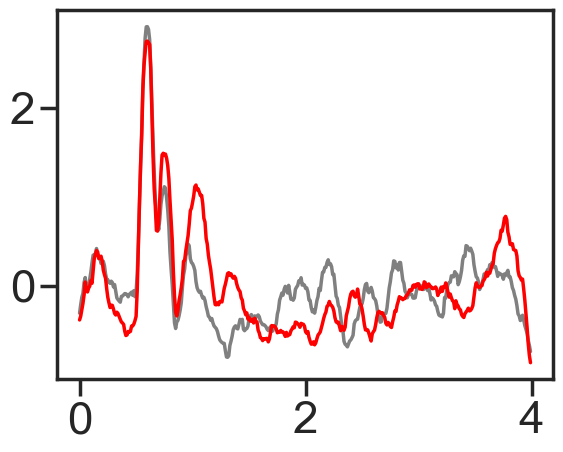

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '


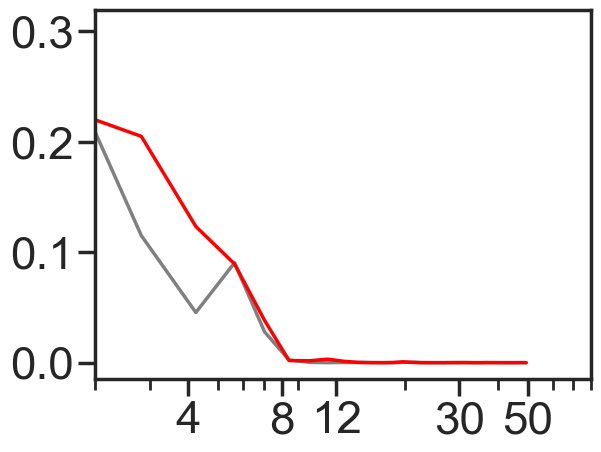

ET445


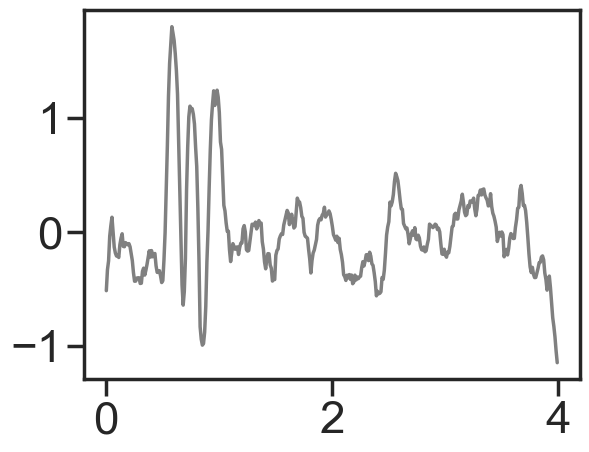

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '


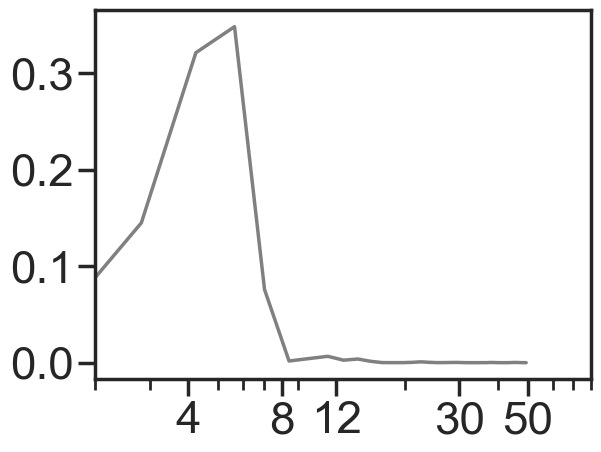

ET747


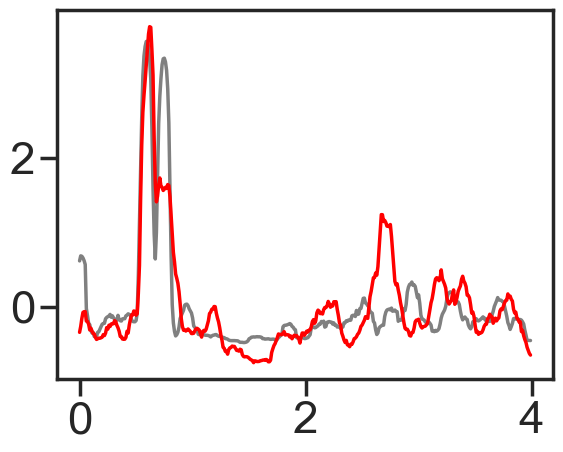

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '


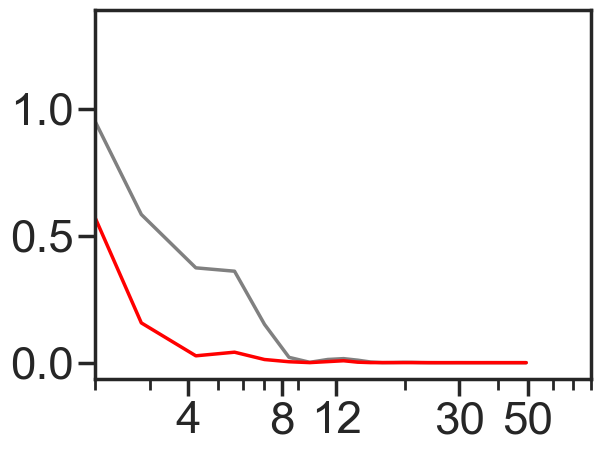

ET748


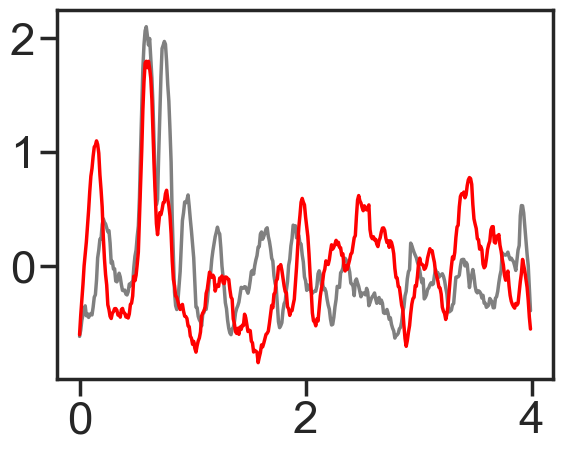

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '


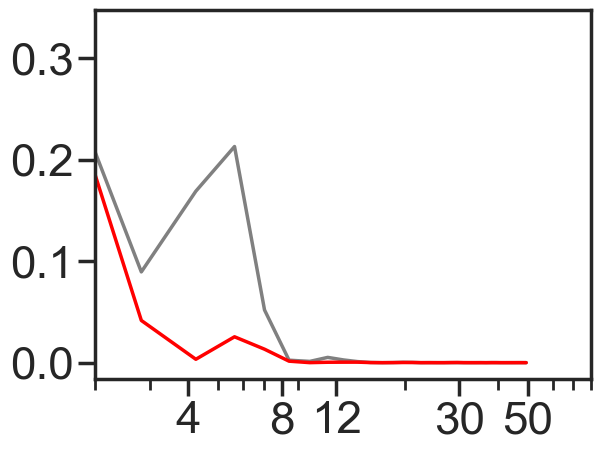

ET749


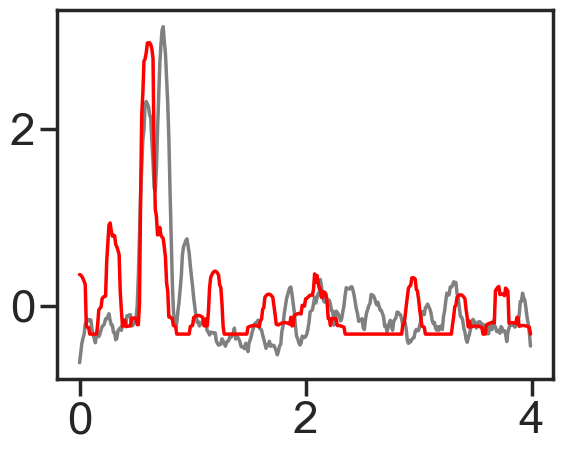

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\scipy\signal\spectral.py:1964: UserWarning: nperseg = 100 is greater than input length  = 71, using nperseg = 71
  warnings.warn('nperseg = {0:d} is greater than input length '


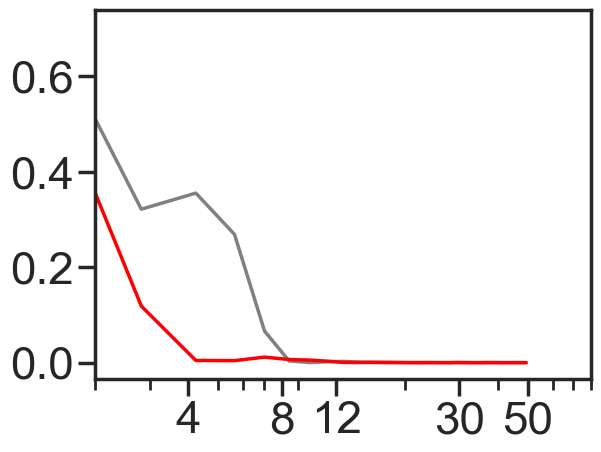

In [227]:
data['et']=data['id'].apply(lambda x:x.split('_')[0])
data['layer']=data.depth.apply(lambda x:int(x>300)+int(x>500))
ls=[]
for n, g in data[(data.pre_post=='post')
                &(data.layer!=2)
                ].groupby(['et']):
    print(n)
    plt.plot(g[g.power=='Control'].times.unique()
             ,g[g.power=='Control'].groupby('times').zscore.mean()
            ,color='gray'
            )
    plt.plot(g[g.power!='Control'].times.unique()
             ,g[g.power!='Control'].groupby('times').zscore.mean()
            ,color='red'
            )
    plt.show()
    f, Pxx_den=scipy.signal.welch(g[(g.power=='Control')
                                    &(g.times.between(0.5,1.2))
                                   ].groupby('times').zscore.mean()
                              , fs=100, nperseg=100
                             , noverlap=100/4, detrend='constant'
                              , return_onesided=True
                              , scaling='spectrum'
                              , axis=-1, average='mean'
                             )
    plt.plot(f,Pxx_den,color='gray')
    ls.append((n,)+('Control',)+(f,Pxx_den,))
    f, Pxx_den=scipy.signal.welch(g[(g.power!='Control')
                                    &(g.times.between(0.5,1.2))
                                   ].groupby('times').zscore.mean()
                              , fs=100, nperseg=100
                             , noverlap=100/4, detrend='constant'
                              , return_onesided=True
                              , scaling='spectrum'
                              , axis=-1, average='mean'
                             )
    ls.append((n,)+('LM ArchT',)+(f,Pxx_den,))
    plt.plot(f,Pxx_den,color='red')
    plt.semilogx()
    plt.xlim(2,80)
    plt.xticks([4,8,12,30,50],[4,8,12,30,50])
   
    plt.show()
    
    

meta NOT subset; don't know how to subset; dropped


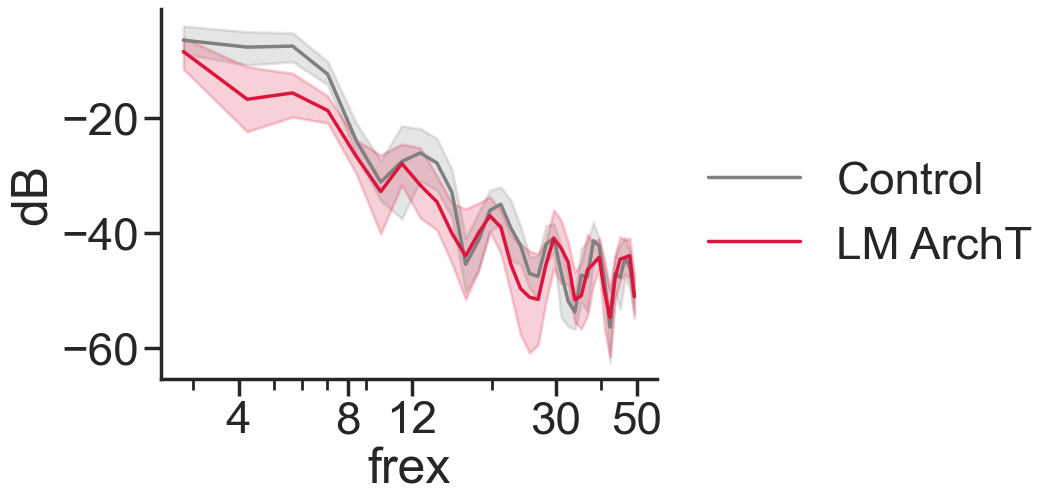

In [283]:
muafftdf=pd.DataFrame(ls,columns=('ET','power','frex','Pxx'))
muafftdf=muafftdf.set_index(['ET','power']).apply(pd.Series.explode).reset_index()
muafftdf['dB']=muafftdf.Pxx.apply(lambda x:np.log10(x)*10)

sns.lineplot(data=muafftdf[muafftdf.frex>2]
             ,x='frex',y='dB'
            ,hue='power'
            )
plt.legend(bbox_to_anchor=(1.02,0.7),frameon=False)
# plt.xlim(2,51)
#     ax[i].
plt.semilogx()
plt.xticks([4,8,12,30,50],[4,8,12,30,50])
sns.despine()
# plt.savefig(report_directory+'muafft_l234_500-1200.png')
# plt.savefig(report_directory+'muafft_l234_500-1200.pdf')

In [232]:
muafftdf.loc[muafftdf.frex.between(4,8),'band']='4-8'
muafftdf.loc[muafftdf.frex.between(8,12),'band']='8-12'
muafftdf.loc[muafftdf.frex.between(12,30),'band']='12-30'
muafftdf.loc[muafftdf.frex.between(30,50),'band']='30-50'
muafftdf.head()

,ET,power,frex,Pxx,dB,band
0,ET426,Control,0.0,0.00107,-29.707370,NaN
1,ET426,Control,1.408451,0.897748,-0.468458,NaN
2,ET426,Control,2.816901,0.458236,-3.389104,NaN
3,ET426,Control,4.225352,0.074136,-11.299700,4-8
4,ET426,Control,5.633803,0.048049,-13.183175,4-8


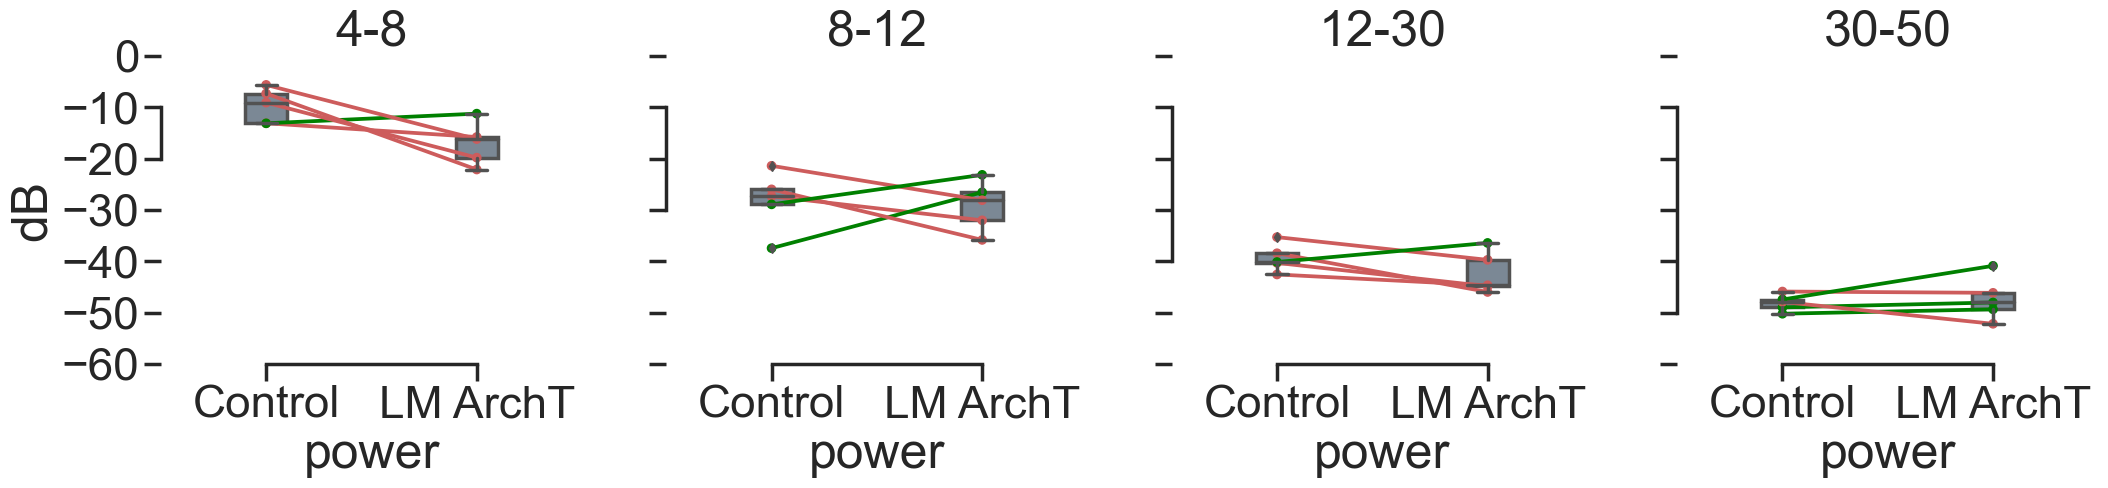

In [276]:
toplot=muafftdf.groupby(['ET','power','band']).dB.mean().reset_index()
f,ax=plt.subplots(1,4,figsize=(25,4),sharey=True)
for i,band in enumerate(['4-8', '8-12','12-30', '30-50', ]):
    pg.plot_paired(data=toplot[toplot.band==band]
                   ,dv='dB',within='power'
                  ,subject='ET'
                   ,ax=ax[i]
                  )
    ax[i].set_title(band)
    ax[i].set_yticks(np.arange(-60,1,10))
# ax.set_yticklabels(np.arange(0,80,10))
# sns.despine(ax,trim=False)
# plt.savefig(report_directory+'muafft_500-1200_bands.png')
# plt.savefig(report_directory+'muafft_500-1200_bands.pdf')

In [266]:
totest=toplot.groupby(['ET','band']).filter(lambda x:x.power.nunique()>1
                               )
description=totest.groupby(['band','power']).describe()
norm=totest.groupby(['band','power']).apply(pg.normality)
anova=pg.anova(data=totest,dv='dB',between=['power','band'])
# pg.pairwise_tests(data=toplot,dv='dB',between=['band','power']
#                  ,interaction=True
#                   ,parametric=False
#                  )
stats=totest.groupby(['band']).apply(lambda x:pg.wilcoxon(x[x.power.str.contains('Arch')].dB
                                                   ,x[x.power.str.contains('Control')].dB
                                                   ))
# stats.to_csv(report_directory+'muafft_500-1200_bands_stats.csv')
# norm.to_csv(report_directory+'muafft_500-1200_bands_normality.csv')
# anova.to_csv(report_directory+'muafft_500-1200_bands_anova.csv')
# description.to_csv(report_directory+'muafft_500-1200_bands_description.csv')
stats

,,W-val,alternative,p-val,RBC,CLES
band,,,,,,
12-30,Wilcoxon,2.0,two-sided,0.1875,-0.733333,0.28
30-50,Wilcoxon,5.0,two-sided,0.6250,0.333333,0.48
4-8,Wilcoxon,1.0,two-sided,0.1250,-0.866667,0.08
8-12,Wilcoxon,7.0,two-sided,1.0000,-0.066667,0.44


characterization of oscillations

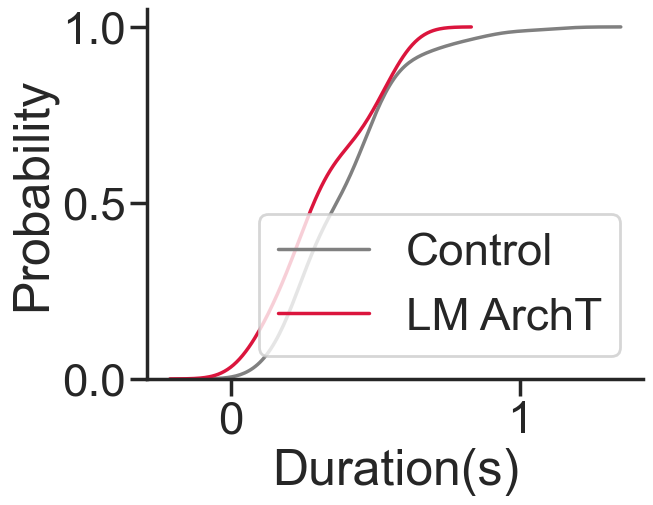

In [62]:
ls=[]
tmpd=data[data.pre_post=='post']
for power in tmpd.power.unique():
    tmp = tmpd[tmpd.power==power]
    for id in tmp.id.unique():
        tmp1 = tmp[tmp.id==id].zscore
        dur = func._duration_peaks_unit(tmp1)
        dic = {'power': power,
               'id': id,
               'dur':dur}
        ls.append(dic)
ls
tmpdf=pd.DataFrame(ls)

# f, ax = plt.subplots(1,3, sharex=True)#,figsize = (20,15))
for power in sorted(tmpdf.power.unique()):
    i = tmpdf.power.unique().tolist().index(power)
    tmp = tmpdf[tmpdf['power']==power]
    sns.kdeplot(tmp.dur.dropna(), cumulative = True, label = power)
sns.despine()
plt.xlabel('Duration(s)')
plt.ylabel('Probability')
plt.legend()

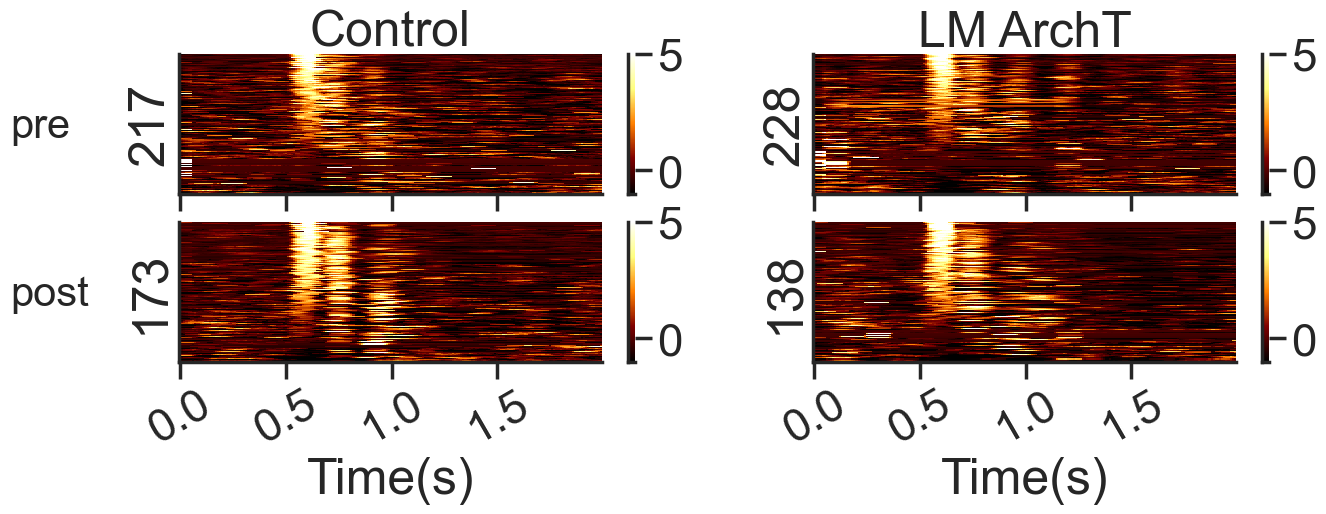

In [241]:
%matplotlib inline
f, ax = plt.subplots(len(data.pre_post.unique()), len(data.power.unique()), sharex= True, 
#                      sharey=True,
                     figsize = (15,4))
for i,pp in enumerate(sorted(data.pre_post.unique(), reverse=True)):
    tmp = data[data.pre_post==pp]
    for ix,power in enumerate(sorted(tmp.power.unique())):
        tmp1 = tmp[tmp.power==power]
        hm = tmp1.pivot('id', 'times', 'zscore')
        sorted1=pd.concat([hm.iloc[:,50:70].mean(axis=1).to_frame('tw1')
                              ,hm.iloc[:,70:90].mean(axis=1).to_frame('tw2')
                              ,hm.iloc[:,90:110].mean(axis=1).to_frame('tw3')]
                             ,axis=1
                             ).sort_values(by=['tw1','tw2','tw3'
                                              ],ascending=False).index.to_list()
        hm = hm.reindex(sorted1).values
#         hm = hm.values[np.argsort(np.mean(hm.values[:,50:70],axis=1))]
        sns.heatmap(hm, cmap = 'afmhot',  annot=False, xticklabels=  50, vmax=5, 
                    center = 2, vmin = -1, robust = True, yticklabels=False, ax=ax[i][ix] )
        sns.despine()
        ax[0][ix].set_title(power)
        ax[1][ix].set_xlabel('Time(s)')
        ax[1][ix].set_xticklabels(np.arange(0,4,0.5), rotation=30)
        ax[i][ix].set_ylabel(tmp1.id.nunique())
        ax[i][ix].set_xlim(0,200)
    ax[i][0].text(-0.4,0.4,pp,fontsize=30, transform=ax[i][0].transAxes, )

# plt.savefig(report_directory+'_zsc2_2ndgui.pdf')
# plt.savefig(report_directory+'_zsc2_2ndgui.png')

    
  

In [63]:
from detect_peaks import detect_peaks
peaks=data.groupby(['id','power']).apply(lambda x:detect_peaks(x.zscore.values
                                                               ,mph=0.5,mpd=10
                                                              )/100
                             ).to_frame('peaks').reset_index()
peaks=peaks.explode('peaks')
peaks['pre_post']=peaks.id.transform(lambda x:x.split('_')[1])
peaks['et']=peaks.id.transform(lambda x:x.split('_')[0].replace('ET','ET#'))
# peaks['group']=peaks.et.map(new)
peaks.head()

,id,power,peaks,pre_post,et
0,ET426_post_185,Control,0.6,post,ET#426
0,ET426_post_185,Control,0.76,post,ET#426
1,ET426_post_208,LM ArchT,2.53,post,ET#426
2,ET426_post_210,Control,0.75,post,ET#426
2,ET426_post_210,Control,0.9,post,ET#426


C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


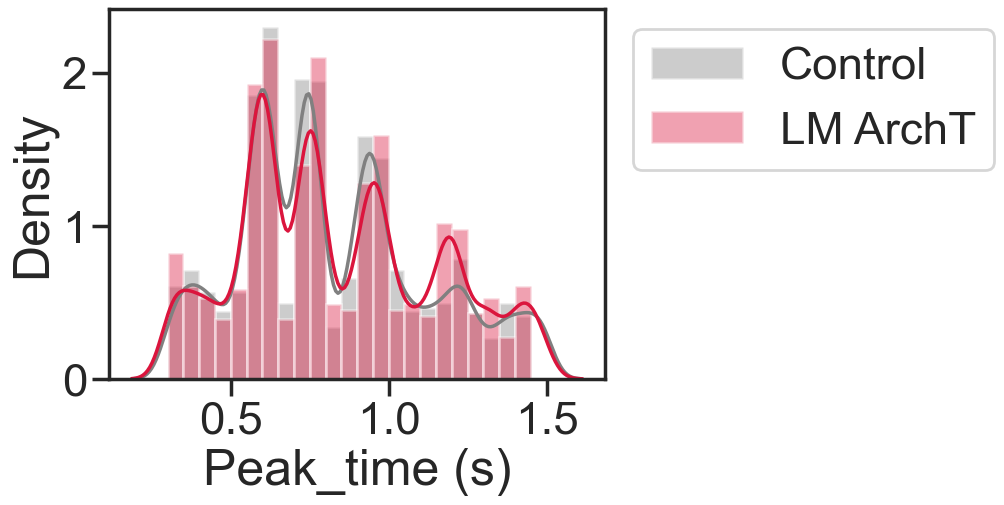

In [257]:
sns.distplot(peaks[(peaks.power=='Control')
                    &(peaks.peaks<=1.5)
                   &(peaks.peaks>=0.3)
#                   &(~peaks.freq.isna())
                 ].peaks
            ,bins=np.arange(0.3,1.5,0.05)
             ,kde_kws={'bw_adjust':.5}
             ,label='Control'
            )
sns.distplot(peaks[(peaks.power!='Control')
                    &(peaks.peaks<=1.5)
                   &(peaks.peaks>=0.3)
#                   &(~peaks.freq.isna())
                 ].peaks
            ,bins=np.arange(0.3,1.5,0.05)
             ,kde_kws={'bw_adjust':.5}
             ,label='LM ArchT'
            )
plt.xticks(np.arange(0.5,1.6,0.5))
plt.xlabel('Peak_time (s)')
plt.legend(bbox_to_anchor=[1.01,1.01])
# plt.savefig(report_dir + '\_post_peaktimes_mph0.5.pdf')
# plt.savefig(report_dir + '\_post_peaktimes_mph0.5.png')

In [64]:
import scipy
scipy.stats.ks_2samp(peaks[(peaks.power=='Control')
                         &(peaks.peaks<=1.5)
                         &(peaks.peaks>=0.3)
                         ].peaks, 
                    peaks[(peaks.power=='LM ArchT')
                         &(peaks.peaks<=1.5)
                         &(peaks.peaks>=0.3)
                         ].peaks
                          )

KstestResult(statistic=0.051025319078504744, pvalue=0.1091835016001913)

In [65]:
freq=data.groupby(['id','power']).apply(lambda x:1/np.diff(detect_peaks(x.zscore.values
                                                                        ,mph=0.5
#                                                                         ,mpd=10
                                                                       ))*100
                             ).to_frame('fx').reset_index()
# freq
# freq.fx.transform(lambda x: len(x)>0 )
freq['freq']=freq.fx.transform(lambda x:np.nanmedian(x) if len(x)>=1 else np.nan)
# freq
freq['pre_post']=freq.id.transform(lambda x:x.split('_')[1])
freq['et']=freq.id.transform(lambda x:x.split('_')[0].replace('ET','ET#'))
# freq['group']=freq.et.map(new)
freq.head()

,id,power,fx,freq,pre_post,et
0,ET426_post_185,Control,[6.25],6.250000,post,ET#426
1,ET426_post_208,LM ArchT,[],NaN,post,ET#426
2,ET426_post_210,Control,"[6.666666666666667, 0.5235602094240838, 7.1428...",6.666667,post,ET#426
3,ET426_post_210,LM ArchT,"[0.8130081300813009, 20.0, 20.0]",20.000000,post,ET#426
4,ET426_post_219,Control,"[9.090909090909092, 50.0, 7.142857142857142, 5...",10.795455,post,ET#426


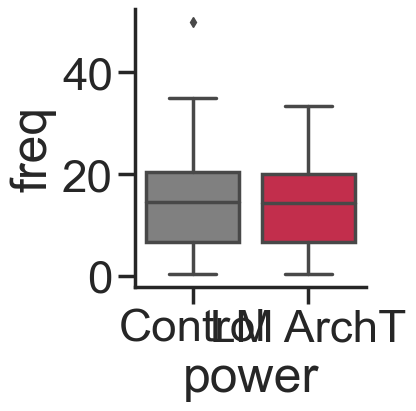

In [67]:
sns.catplot(data=freq,x='power',y='freq'
            ,kind='box'
#            ,hue='power'
           )

In [68]:
report_dir=report_directory

C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tangy\anaconda3\envs\neurosig\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


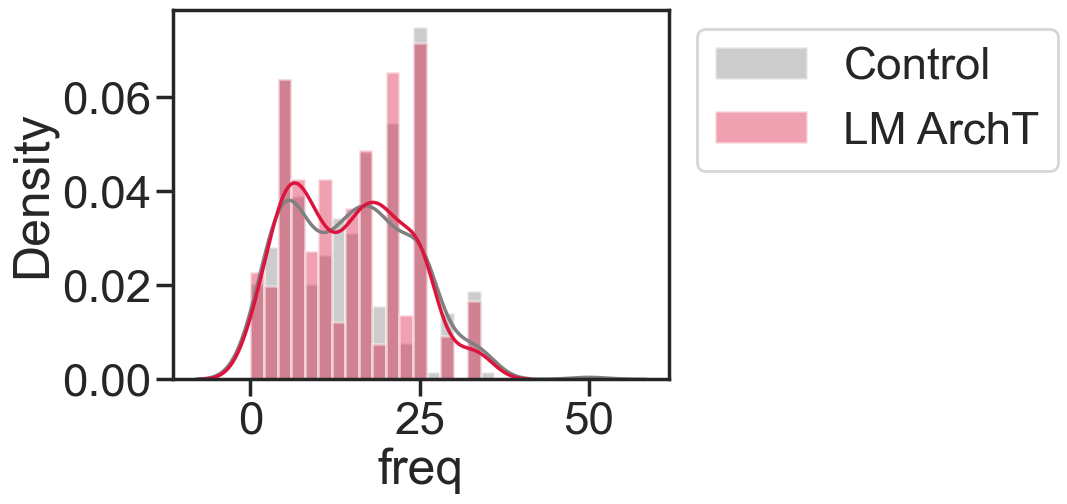

In [70]:
toplot=freq.groupby('id').filter(lambda x:x.power.nunique()>1)
sns.distplot(toplot[(toplot.power=='Control')
                  &(~toplot.freq.isna())
                 ].freq
            ,bins=np.arange(0,50,2)
             ,label='Control'
            )
sns.distplot(toplot[(toplot.power=='LM ArchT')
                  &(~toplot.freq.isna())
                 ].freq
            ,bins=np.arange(0,50,2)
             ,label='LM ArchT'
            )
# plt.xticks(np.arange(0,10,2))
plt.legend(bbox_to_anchor=[1.01,1.01])
# plt.semilogx()
# plt.savefig(report_dir + '\_post_oscifreq_mph0.5.pdf')
# plt.savefig(report_dir + '\_post_oscifreq_mph0.5.png')

In [71]:
scipy.stats.ks_2samp(toplot[(toplot.power=='Control')
#                          &(toplot.peaks<=1.5)
#                          &(toplot.peaks>=0.3)
                         ].freq, 
                    toplot[(toplot.power=='LM ArchT')
#                          &(toplot.peaks<=1.5)
#                          &(toplot.peaks>=0.3)
                         ].freq
                          )

KstestResult(statistic=0.04927536231884058, pvalue=0.7971484834178391)